(512, 512, 3)

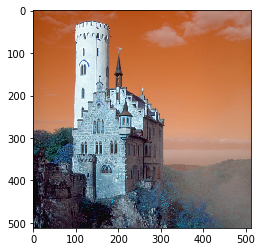

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



image = np.array(cv2.imread('H:/CV/assignment 2/test.png'))

#plt.rcParams['image.cmap'] = 'gray'
plt.imshow(image)
image.shape


In [2]:
def zero_pad(X, pad):
    
    X_pad = np.pad(X, ((pad, pad), (pad, pad), (0,0)), 'constant', constant_values=0)
    
    
    return X_pad

(514, 514, 3)

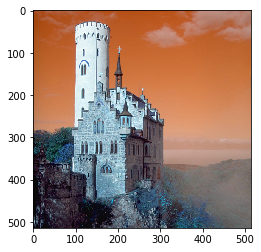

In [3]:
x_pad = zero_pad(image, 1)
plt.imshow(x_pad)
x_pad.shape

In [4]:
k =[]

#sharpen
k.append(np.array([[0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]]))

#laplacian 
k.append(np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]]))

#emboss 
k.append(np.array([[-2, -1, 0], 
                   [-1, 1, 1], 
                   [0, 1, 2]]))

#outline 
k.append(np.array([[-1, -1, -1], 
                    [-1, 8, -1], 
                    [-1, -1, -1]]))

#bottom_sobel 
k.append(np.array([[-1, -2, -1], 
                         [0, 0, 0], 
                         [1, 2, 1]]))

#left_sobel 
k.append(np.array([[1, 0, -1], 
                       [2, 0, -2], 
                       [1, 0, -1]]))

#right_sobel 
k.append(np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]]))

#top_sobel 
k.append(np.array([[1, 2, 1], 
                      [0, 0, 0], 
                      [-1, -2, -1]]))

j = ['sharpen', 'laplacian', 'emboss', 'outline', 'bottom_sobel', 'left_sobel', 'right_sobel', 'top_sobel']

In [5]:
result = []
for i in range (8):
    result.append(cv2.filter2D(x_pad, -1, k[i]))


In [6]:
def plot(j,l):
    w = 10
    h = 10
    fig = plt.figure(figsize=(10, 10))
    columns = 8
    rows = 1

    # prep (x,y) for extra plotting
    #xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    #ys = np.abs(np.sin(xs))           # absolute of sine

    # ax enables access to manipulate each of subplots
    ax = []
    a=0
    for i in range(columns*rows):
        img = np.random.randint(10, size=(h,w))
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title(""+str(l[i]))  # set title
        plt.imshow(j[i])
        a+=1

    # do extra plots on selected axes/subplots
    # note: index starts with 0
    #ax[2].plot(xs, 3*ys)
    #ax[19].plot(ys**2, xs)

    plt.show()

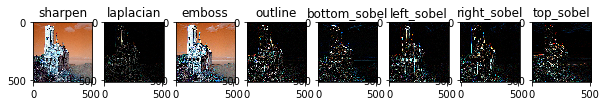

In [7]:
plot(result,j)